<a href="https://colab.research.google.com/github/TomvandeLooij/afcs/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from: https://www.kaggle.com/leonzz/m5-forecasting-arima/data?select=sell_prices.csv

In [39]:
import gc
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from datetime import datetime
from itertools import cycle
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
warnings.filterwarnings('ignore')

In [5]:
sell_prices            = pd.read_csv('/content/sell_prices_afcs2020.csv')
sample_submission      = pd.read_csv('/content/sample_submission_afcs2020.csv')
calendar               = pd.read_csv('/content/calendar_afcs2020.csv')
sales_train_validation = pd.read_csv('/content/sales_train_validation_afcs2020.csv')

In [33]:
category_sales       = sales_train_validation.groupby(sales_train_validation['dept_id']).sum()
category_salest      = category_sales.transpose()
category_salest['d'] = category_salest.index

#Merge this with the calendar data set to look at trends
category_level_final         = category_salest.merge(calendar, on='d')
category_level_final['date'] = category_level_final['date'].str.replace('/', '-')
category_level_final['date'] = category_level_final['date'].apply(lambda t: datetime.strptime(t, '%m-%d-%Y'))

category_level_model = category_level_final.copy()
category_level_model['HOBBIES_2'].loc[category_level_model['event_name_1'] == 'Christmas'] = category_level_final['HOBBIES_2'].mean()

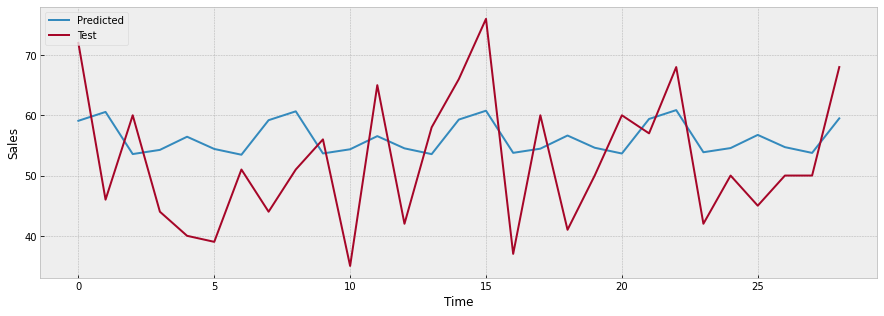

In [50]:
train_hobbies   = np.asarray(category_level_model['HOBBIES_2'][0:1883].astype(float))
test_hobbies    = np.asarray(category_level_model['HOBBIES_2'][1883:-1].astype(float))
mod_hobbies     = sm.tsa.statespace.SARIMAX(train_hobbies, order=(0,1,1), seasonal_order=(0,1,1,7))
results_hobbies = mod_hobbies.fit() 

plt.figure(figsize=(15,5))
plt.plot(results_hobbies.predict(start = len(train_hobbies), end = 1911), label = 'Predicted')
plt.plot(test_hobbies, label = 'Test')
plt.legend(loc = 'upper left')

rmse = math.sqrt(mean_squared_error(results_hobbies.predict(start = 1883, end = 1911), test_hobbies))
plt.ylabel('Sales')
plt.xlabel('Time')
plt.savefig('sarima.jpg')

In [52]:
category_level_model

,HOBBIES_2,d,date,wm_yr_wk,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA
0,19.0,d_1,2011-01-29,11101,NaN,NaN,NaN,NaN,0
1,29.0,d_2,2011-01-30,11101,NaN,NaN,NaN,NaN,0
2,24.0,d_3,2011-01-31,11101,NaN,NaN,NaN,NaN,0
3,29.0,d_4,2011-02-01,11101,NaN,NaN,NaN,NaN,1
4,20.0,d_5,2011-02-02,11101,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
1908,45.0,d_1909,2016-04-20,11612,NaN,NaN,NaN,NaN,0
1909,50.0,d_1910,2016-04-21,11612,NaN,NaN,NaN,NaN,0
1910,50.0,d_1911,2016-04-22,11612,NaN,NaN,NaN,NaN,0
1911,68.0,d_1912,2016-04-23,11613,NaN,NaN,NaN,NaN,0
